In [59]:
import osmnx as ox

import matplotlib.pyplot as plt

place_name = "Tartu, Estonia"

# POINT (659278.9713042672 6473994.263822624)

graph = ox.graph_from_place(place_name)

In [60]:
graph

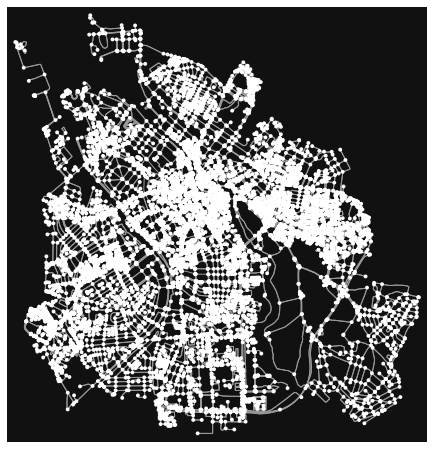

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax = ox.plot_graph(graph)

plt.tight_layout()

In [62]:
nodes, edges = ox.graph_to_gdfs(graph)

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
edges.head()

osmid lanes  ref               name  \
0                          35742158     4    3               Riia   
1                          35742158     4    3               Riia   
2                         489022084   NaN  NaN                NaN   
3                         117178126     5    3               Riia   
4  [731962213, 730852870, 29394711]     4    3  [Riia, Narva mnt]   

         highway maxspeed  oneway   length  \
0          trunk       50   False   78.764   
1          trunk       50   False   17.786   
2  tertiary_link      NaN    True   21.075   
3          trunk       50    True   65.343   
4          trunk       50   False  137.133   

                                            geometry bridge junction service  \
0  LINESTRING (26.72590 58.37636, 26.72521 58.37576)    NaN      NaN     NaN   
1  LINESTRING (26.72590 58.37636, 26.72606 58.37650)    NaN      NaN     NaN   
2  LINESTRING (26.72590 58.37636, 26.72625 58.37642)    NaN      NaN     NaN   
3  LINESTRING (26.73016 58.37857, 26.72998 58.378...    NaN      NaN     NaN   
4  LINESTRING (26.73016 58.37857, 26.73027 58.378...    yes      NaN     NaN   

  tunnel access width        u           v  key  
0    NaN    NaN   NaN  8220894  2564295040    0  
1    NaN    NaN   NaN  8220894  2467752508    0  
2    NaN    NaN   NaN  8220894  4813097798    0  
3    NaN    NaN   NaN  8220933  6854135436    0  
4    NaN    NaN   NaN  8220933     8220941    0

In [64]:
streets_3301 = edges.to_crs(3301)

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

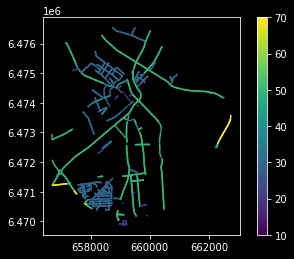

In [65]:
import numpy as np

def clean_speed(x):
    try:
        if isinstance(x, str):
            return float(x)
        elif isinstance(x, float):
            return x
        elif isinstance(x, np.int64):
            return x
        elif isinstance(x, np.float):
            return x
        elif x is None:
            return 20
        elif isinstance(x, list):
            return clean_speed(x[0])
        elif np.isnan(x):
            return 20
        else:
            return x
    except:
        print(type(x))
        return 20
    
streets_3301['speed'] = streets_3301['maxspeed'].apply(clean_speed)

streets_3301.plot(column='speed', cmap='viridis', legend=True)

In [66]:
# configure the inline image display
extension = 'png'
size = 240

# specify that we're retrieving building footprint geometries
tags = {'building': True}

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.


<AxesSubplot:>

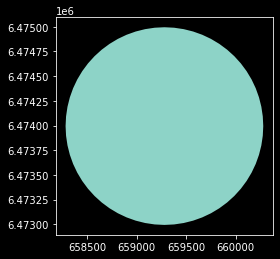

In [70]:
import geopandas as gpd
import pandas as pd

center = Point(659278.9713042672, 6473994.263822624)
dist = 1000
geom = center.buffer(1000)

cut_out = gpd.GeoDataFrame(pd.DataFrame({'id': [0], 'geom': geom}), geometry='geom', crs=3301)

center_4326 = cut_out.to_crs(4326).centroid

cut_out.plot()

In [79]:
tup_center_4326 = (center_4326.loc[0].y, center_4326.loc[0].x)
print(tup_center_4326)

(58.377327494429146, 26.7231706562894)


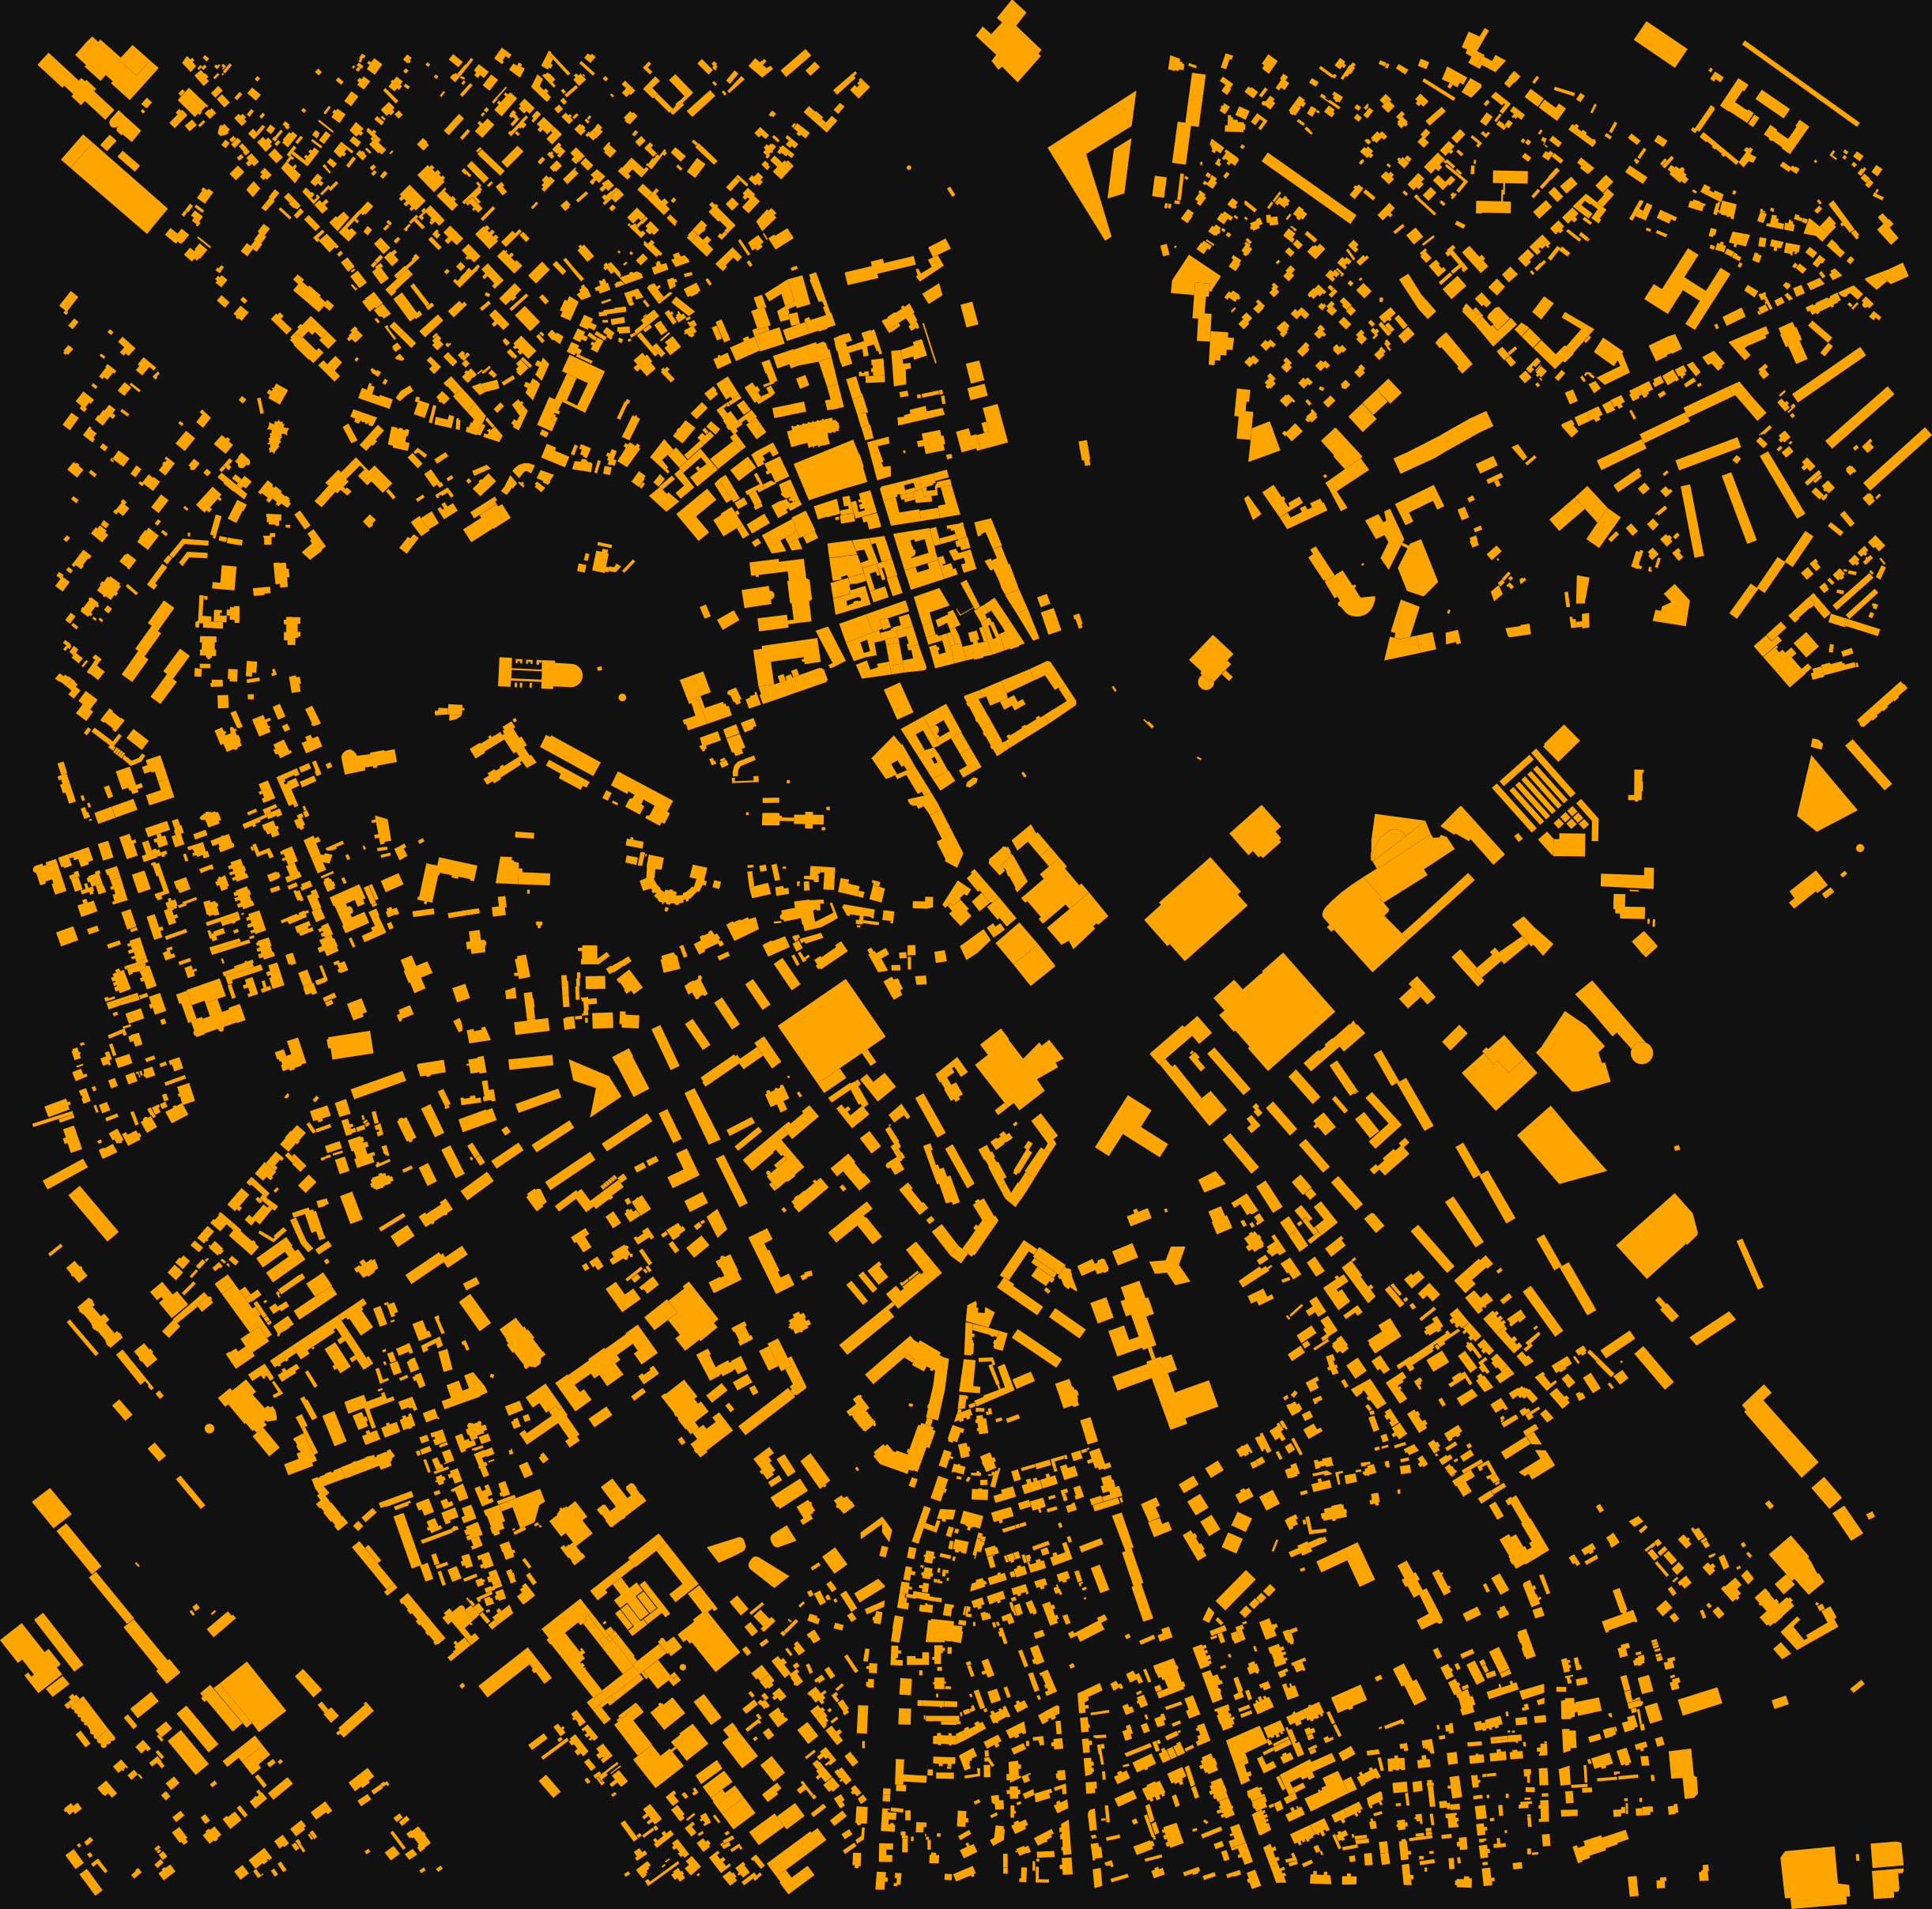

In [80]:
from IPython.display import Image
from shapely.geometry import box, Point

# gdf = ox.geometries_from_place('Kesklinn, Tartu, Estonia', tags)
gdf = ox.geometries_from_point(tup_center_4326, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)
fp = f'kesklinn.{extension}'
fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

In [81]:
# save as a shapefile
gdf_save = gdf.applymap(lambda x: str(x) if isinstance(x, list) else x)
gdf_save.drop(labels='nodes', axis=1).to_file('kesklinn.gpkg', driver='GPKG')

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
buildings_3301 = gdf_proj.to_crs(3301)

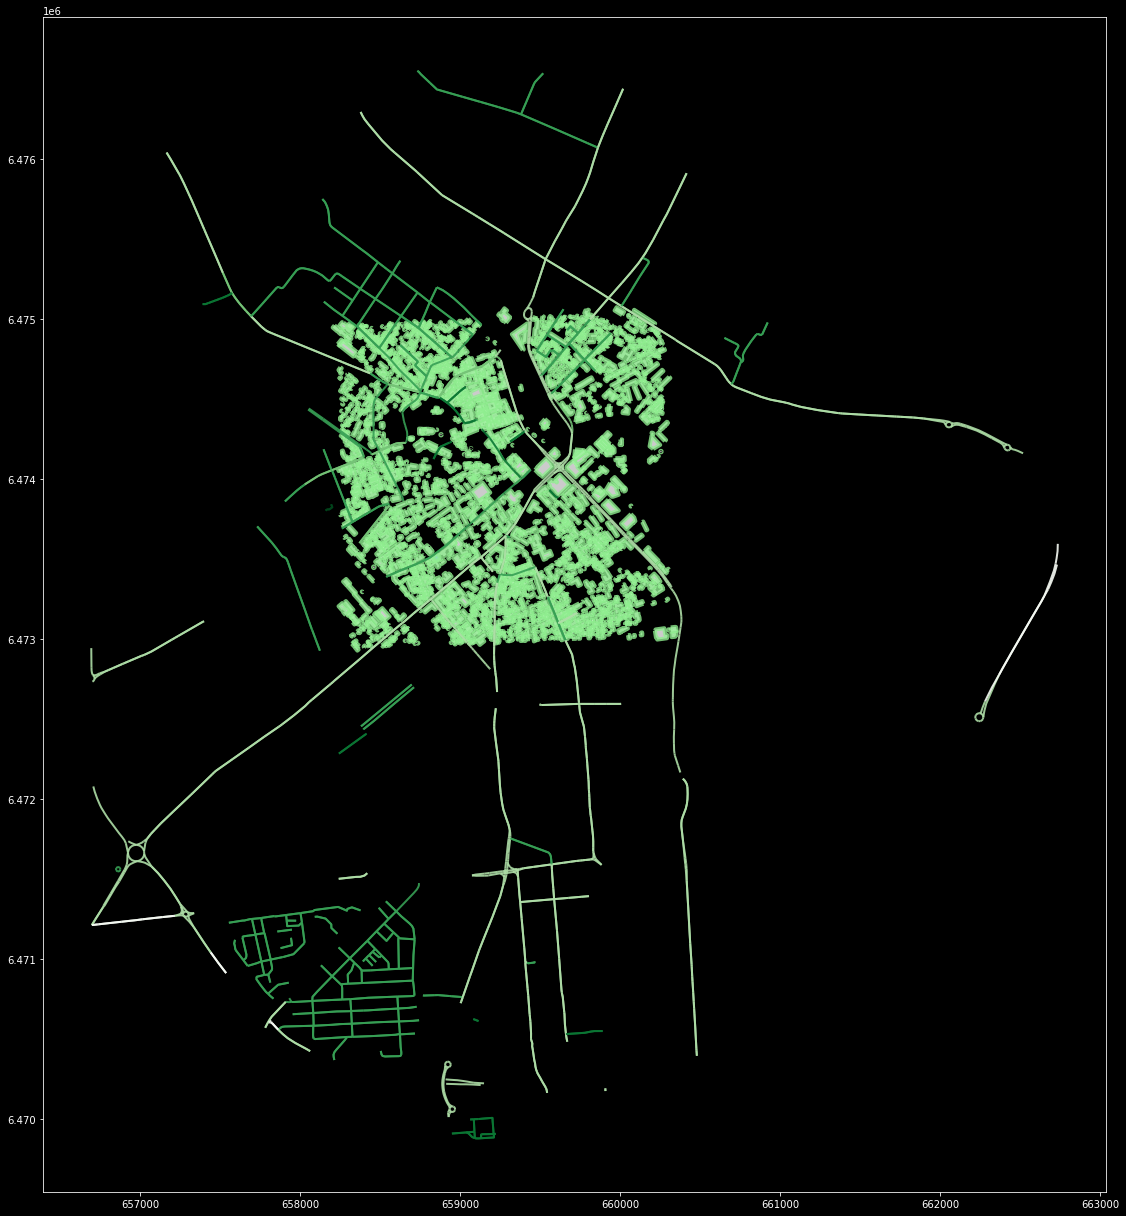

In [83]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(21,17))

# gdf_proj.plot(ax=ax, facecolor='black')

streets_3301.plot(ax=ax, linewidth=2, alpha=0.9, column='speed', cmap='Greens_r')

buildings_3301.plot(ax=ax, lw=4, edgecolor='lightgreen', facecolor='white', alpha=0.8)

plt.tight_layout()

In [84]:
streets_cut = gpd.overlay(streets_3301, cut_out, how='intersection')

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
buildings_3301['geom_type'] = buildings_3301['geometry'].apply(lambda x: x.geom_type)

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
buildings_3301.head(5)

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id       osmid element_type                 source  \
0  node/2345996395  2345996395         node                    NaN   
1     way/30221555    30221555          way  Tartu City Government   
2     way/30221557    30221557          way  Tartu City Government   
3     way/30221572    30221572          way  Tartu City Government   
4     way/30221578    30221578          way  Tartu City Government   

                                            geometry man_made amenity  \
0                     POINT (658850.358 6473516.317)      NaN     NaN   
1  POLYGON ((658760.374 6474637.790, 658751.441 6...      NaN     NaN   
2  POLYGON ((658541.394 6474500.851, 658555.129 6...      NaN     NaN   
3  POLYGON ((659972.170 6473226.112, 659961.295 6...      NaN     NaN   
4  POLYGON ((658465.416 6474591.748, 658469.903 6...      NaN     NaN   

  operator wheelchair building  ... payment:coins self_service fixme  \
0      NaN        NaN      yes  ...           NaN          NaN   NaN   
1      NaN        NaN      yes  ...           NaN          NaN   NaN   
2      NaN        NaN   school  ...           NaN          NaN   NaN   
3      NaN        NaN      yes  ...           NaN          NaN   NaN   
4      NaN        NaN      yes  ...           NaN          NaN   NaN   

  guest_house substation ways abandoned:amenity historic type geom_type  
0         NaN        NaN  NaN               NaN      NaN  NaN     Point  
1         NaN        NaN  NaN               NaN      NaN  NaN   Polygon  
2         NaN        NaN  NaN               NaN      NaN  NaN   Polygon  
3         NaN        NaN  NaN               NaN      NaN  NaN   Polygon  
4         NaN        NaN  NaN               NaN      NaN  NaN   Polygon  

[5 rows x 125 columns]

In [87]:
buildings_3301 = buildings_3301.loc[buildings_3301['geom_type'].isin(['Polygon', 'MultiPloygon'])]

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
buildings_cut = gpd.overlay(buildings_3301, cut_out, how='intersection')

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    agg_filter = None
    alpha = None
    animated = False
    bbox_patch = None
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    color or c = white
    contains = None
    figure = Figure(1512x1224)
    fontfamily or family = ['sans-serif']
    fontname or name = DejaVu Sans
    fontproperties or font or font_properties = sans\-serif:style=normal:variant=normal:weight=nor...
    fontsize or size = 20.0
    fontstyle or style = normal
    fontvariant or variant = normal
    fontweight or weight = normal
    gid = None
    horizontalalignment or ha = center
    in_layout = True
    label = 
    path_effects = []
    picker = None
    position = (0.5, 1.0)
    prop_tup = (0.5, 1.0, 'Tartu city, buildings and streets from...
    rasterized = None
    rotation = 0.0
    rotation_mode = None
    sketch_params = None
    snap = None
    stretch = normal
    text = Tartu city, buildings and streets from OpenStreetM...
    transform = CompositeGenericTransform

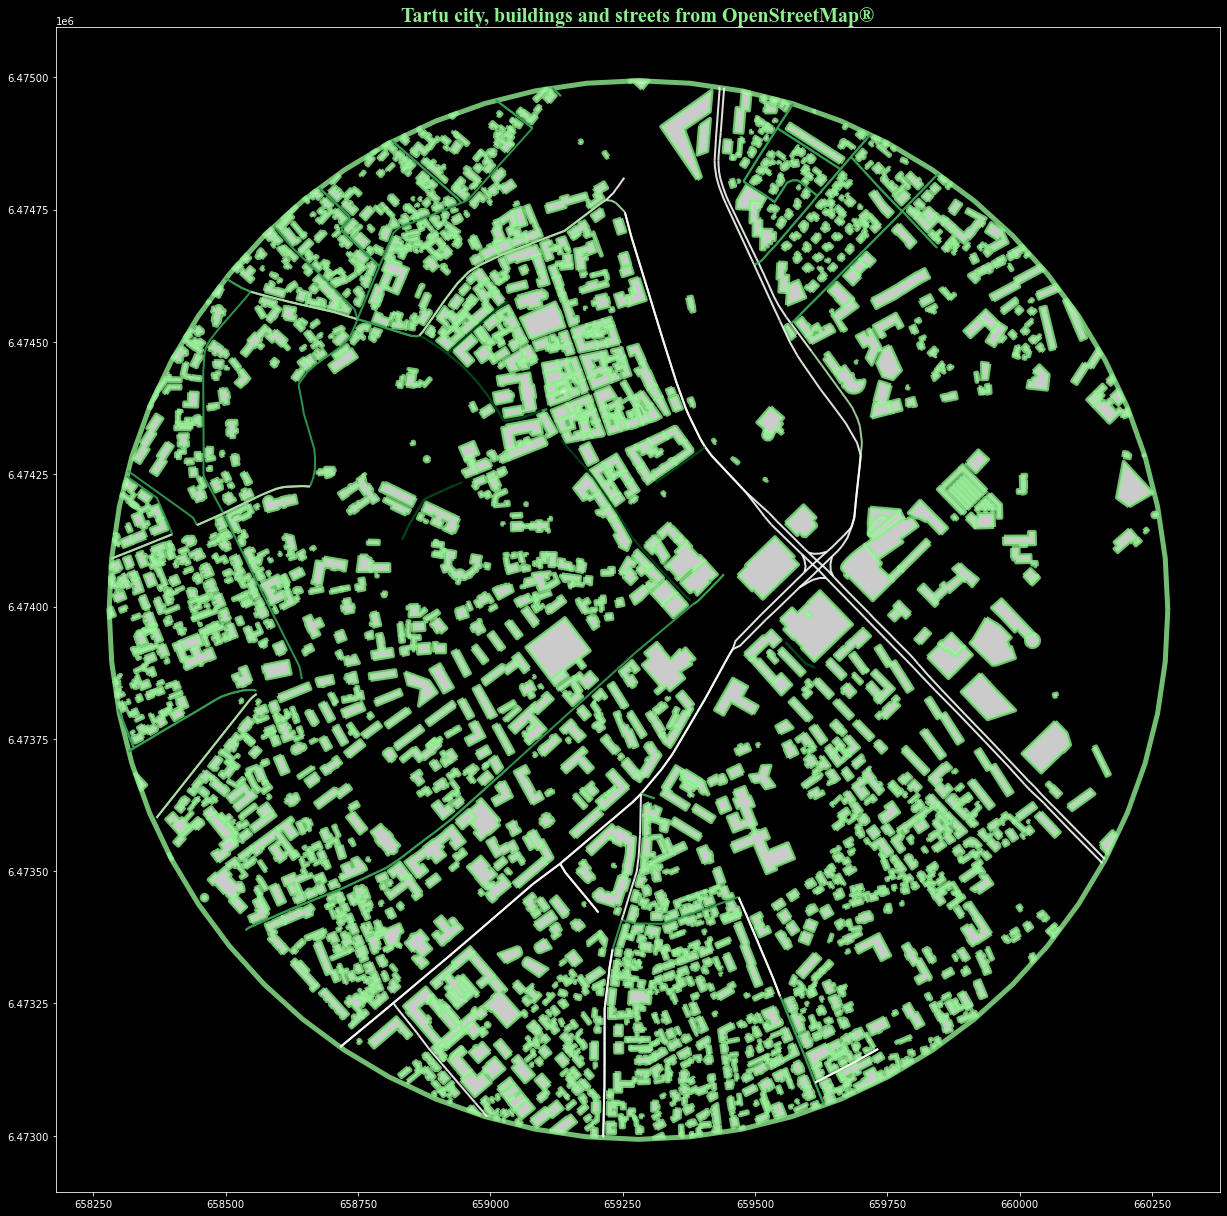

In [100]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(21,17))

# gdf_proj.plot(ax=ax, facecolor='black')

cut_out.plot(ax=ax, facecolor='black', lw=5, edgecolor='lightgreen', alpha=0.8)

streets_cut.plot(ax=ax, linewidth=2, alpha=0.9, column='speed', cmap='Greens_r')

buildings_cut.plot(ax=ax, lw=4, edgecolor='lightgreen', facecolor='white', alpha=0.8)

title_obj = plt.title("Tartu city, buildings and streets from OpenStreetMap®", fontsize=20)
plt.getp(title_obj)                    #print out the properties of title
plt.getp(title_obj, 'text')            #print out the 'text' property for title
plt.setp(title_obj, color='lightgreen', fontname="Times New Roman", fontweight='bold')         #set the color of title to red

plt.tight_layout()
plt.savefig('../source/_static/day-07-green.png', bbox_inches='tight')